## 1.模型评估的目标
**模型评估的目标是选出泛化能力强的模型完成机器学习任务。**

**泛化能力强**的模型能很好地适用于未知的样本，模型的错误率低、精度高。机器学习任务中，我们希望最终能得到**准确预测未知标签的样本、泛化能力强的模型**。

我们需要一整套方法及评价指标：

- **评估方法**：为保证客观地评估模型，对数据集进行的有效划分实验方法。
- **性能指标**：量化地度量模型效果的指标。

## 2.离线与在线实验方法
A/B Test**是目前在线测试中最主要的方法**。A/B Test是为同一个目标制定两个方案让一部分用户使用A方案，另一部分用户使用B方案，记录下用户的使用情况并进行评估

AB Test实验流程：
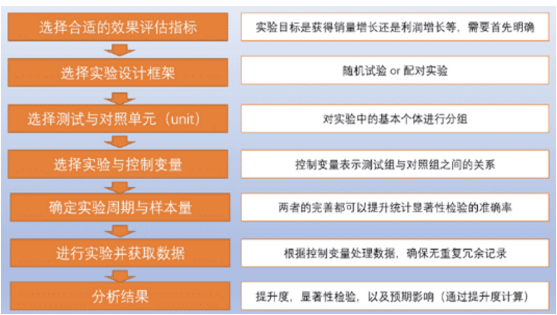

### 2.1、评估指标
在**离线评估**中，经常使用**准确率（Accuracy）、查准率（Precision）、召回率（Recall）、ROC、AUC、PRC**等指标来评估模型。

**在线评估**与离线评估所用的评价指标不同，一般使用一些商业评价指标，如**用户生命周期值（Customer Lifetime value）、广告点击率（Click Through Rate）、用户流失率**（Customer Churn Rate）等指标

## 3、常见模型评估方法介绍
### 3.1 留出法
留出法直接将数据集D划分为两个互斥集合，其中一个集合为训练集S,另一个作为测试机T,即:
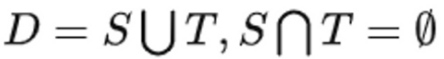
训练集S具体划分为训练集和验证集，训练集构建模型，验证集对该模型进行参数择优，选择最优模型，测试机T测试最优模型的泛化能力。
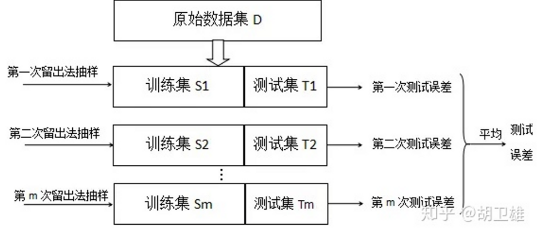

**留出法数据划分**的注意点：

- **随机划分不一定能保证有效性**，因为如果T中正好只取到某一种特殊类型数据，从而带来了额外的误差。此时处理方法要视具体情况而定，如当数据明显的分为有限类时，可以采用分层抽样方式选择测试数据，保证数据分布比例的平衡。
- 单次划分不一定能得到合适的测试集，一般多次重复「**划分 - 训练 - 测试求误差**」的步骤，取误差的平均值。
- 划分的验证集，太大或者太小都不合适，常用做法是选择1/5 - 1/3 **左右数据当作验证集用于评估**。

### 3.2 K折交叉验证
"交叉验证法"(cross validation)先将数据集D划分为k个大小相似的互斥子集：
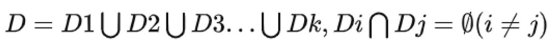

每个子集Di通过分层采样得到,然后用k-1个子集的并集作为训练集，余下的子集作为测试集；这样就获得k组训练/测试集，从而进行k次训练和测试，最后返回的是这k个测试结果的均值。通常把交叉验证法称为“k折交叉验证法”,k最常用的取值是10，此时称为10折交叉验证。如下图：
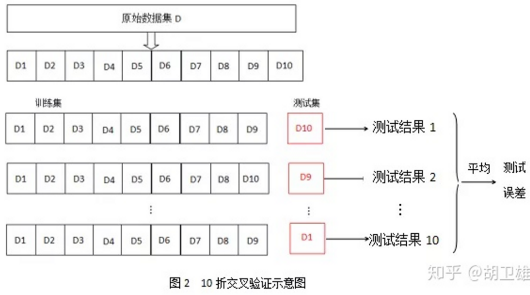

数据量一般较小的时候，K设大一点；数据量大的时候，K可以设小一点。

**一般K=10。当k=m即样本总数时，叫做留一法**。每次的测试集只有一个样本，要进行m次的训练和预测


### 3.3 自助法（Bootstrap)
数据量较少，很难通过已有的数据来估计数据的整体分布，Bootstrap 是一种用小样本估计总体值的一种非参数方法，在进化和生态学研究中应用十分广泛。Bootstrap通过有放回抽样生成大量的伪样本，通过对伪样本进行计算，获得统计量的分布，从而估计数据的整体分布。

每次随机从D中挑出一个样本，将其拷贝放入训练集；然后再将该样本放回初始数据集中，重复执行m次后，得到包含m个样本的训练集$D^’$。数据集D中未出现在$D^’$中的所有样本作为测试集。

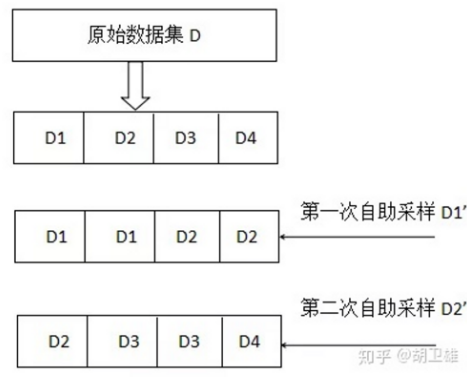

即通过自助采样，初始数据集D中有约36.8%的样本未出现在采样数据集$D^’$中。适用于数据集较小、较难划分训练/测试集。但产生的训练集改变了初始数据集的分布，引入估计偏差。
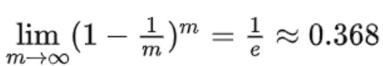

## 4、回归问题常用的评估指标
回归类问题场景下，我们会得到连续值的预测结果，比对标准答案，我们有 MAE、MSE、RMSE 等评估指标（准则）可以衡量预测结果相对实际情况的偏离程度，它们的取值越小说明回归模型的预测越准，模型性能越好。

### 4.1、平均绝对误差 MAE
**平均绝对误差**（**Mean Absolute Error，MAE**），又叫平均绝对离差，是所有标签值与回归模型预测值的偏差的绝对值的平均。

- **优点**：直观地反映回归模型的预测值与实际值之间的偏差。准确地反映实际预测误差的大小。不会出现平均误差中误差符号不同而导致的正负相互抵消。
- **缺点**：不能反映预测的无偏性（估算的偏差就是估计值的期望与真实值的差值。无偏就要求估计值的期望就是真实值）。

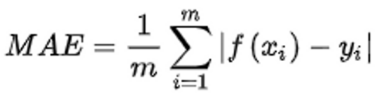

### 4.2、平均绝对百分误差 MAPE
**平均绝对百分误差**（**Mean Absolute Percentage Error，MAPE**）是对 MAE 的一种改进，考虑了绝对误差相对真实值的比例。

• **优点**：考虑了预测值与真实值的误差。考虑了误差与真实值之间的比例。

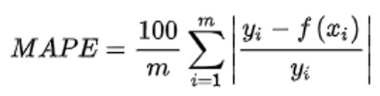

### 4.3、均方误差 MSE
MAE虽能较好衡量回归模型的好坏，但是绝对值的存在导致函数不光滑，在某些点上不能求导。可以考虑将绝对值改为残差的平方，就得到了均方误差。

**均方误差**（**Mean Square Error，MSE**）相对于平均绝对误差而言，均方误差求的是所有标签值与回归模型预测值的偏差的平方的平均。

- **优点**：准确地反映实际预测误差的大小。放大预测偏差较大的值。比较不同预测模型的稳定性。
- **缺点**：不能反映预测的无偏性。
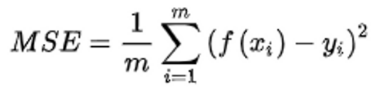

### 4.4、均方根误差 RMSE
均方根误差（Root-Mean-Square Error，RMSE），也称标准误差，是在均方误差的基础上进行开方运算。RMSE会被用来衡量观测值同真值之间的偏差。
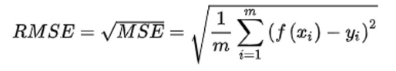

## 5.分类问题常用的评估指标
### 5.1、混淆矩阵
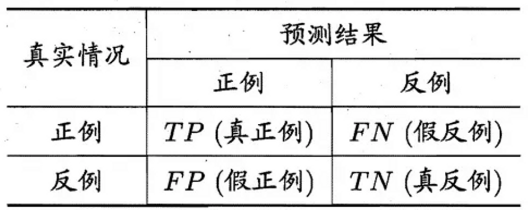
很多评估指标可以基于混淆矩阵计算得到，如下图所示：
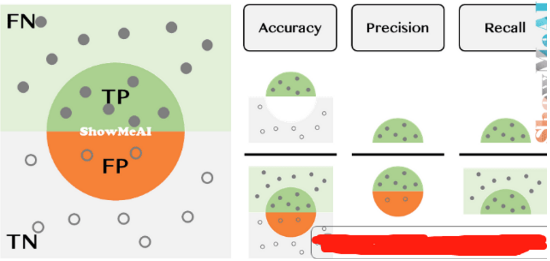

### 5.2、Accuracy 精确率
对于分类问题，精确率（Accuracy）指分类正确的样本数占样本总数的比例，是最常用的指标，可以总体上衡量一个预测的性能。一般情况（数据类别均衡）下，模型的精度越高，说明模型的效果越好。
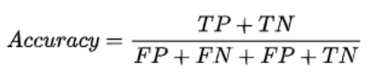

### 5.3、 Precision 查准率
Precision （查准率），又称正确率、准确率，表示在模型识别为正类的样本中，真正为正类的样本所占的比例。一般情况下，查准率越高，说明模型的效果越好。
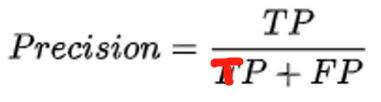

**宁愿漏掉，不可错杀**：在识别垃圾邮件的场景中可能偏向这一种思路，因为不希望很多的正常邮件被误杀，这样会造成严重的困扰。因此，查准率（Precision）将是一个被侧重关心的指标。

### 5.4、 Recall 查全率
Recall （查全率），又称召回率，表示的是，模型正确识别出为正类的样本的数量占总的正类样本数量的比值。一般情况下，Recall 越高，说明有更多的正类样本被模型预测正确，模型的效果越好。
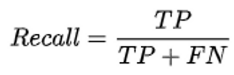

**宁愿错杀，不可漏掉**：在金融风控领域大多偏向这种思路，希望系统能够筛选出所有有风险的行为或用户，然后交给人工鉴别，漏掉一个可能造成灾难性后果。因此，查全率（Recall）将是一个被侧重关心的指标。

### 5.5、Fβ-Score 和 F1-Score
理论上来说，Precision 和 Recall 都是越高越好，但更多时候它们两个是矛盾的，经常无法保证二者都很高。此时，引入一个新指标 ，用来综合考虑 Precision 与 Recall。
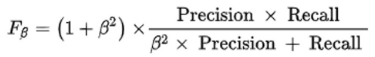
•  $\beta$=1时，$F\beta - Score$ 就是$F1-Score$ ，综合平等考虑 Precision 和 Recall 的评估指标，当 F1值较高时则说明模型性能较好。
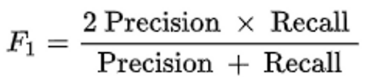
- $\beta$<1时，更关注 Precision。
- $\beta$>1时，更关注 Recall。

### 5.6、ROC
使用 True Positive Rate（TPR，真正例率）和False Positive Rate（FPR，假正例率）两个指标来绘制 ROC 曲线。
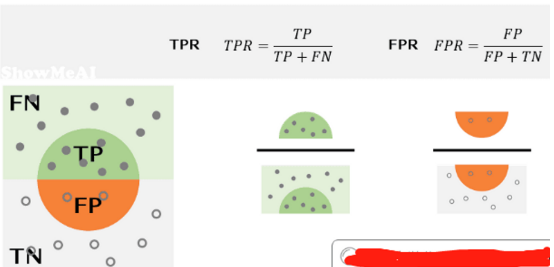

TPR、FPR公式：
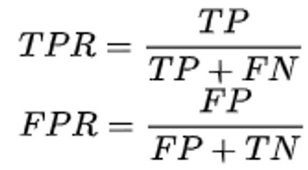

算法对样本进行分类时，都会有置信度，即表示该样本是正样本的概率。

通过置信度可以对所有样本进行降序排序，再逐个样本地选择阈值，比如排在某个样本之前的都属于正例，该样本之后的都属于负例。每一个样本作为划分阈值时，都可以计算对应的 TPR 和 FPR，那么就可以绘制 ROC 曲线。

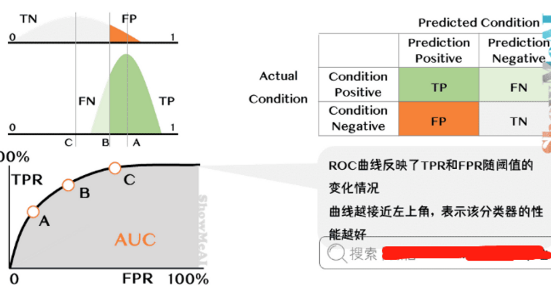

ROC曲线（Receiver Operating Characteristic Curve）全称是「受试者工作特性曲线」。综合考虑了概率预测排序的质量，体现了学习器在不同任务下的「期望泛化性能」的好坏，反映了TPR和FPR随阈值的变化情况

ROC曲线越接近左上角，表示该分类器的性能越好。也就是说模型在保证能够尽可能地准确识别小众样本的基础上，还保持一个较低的误判率，即不会因为要找出小众样本而将很多大众样本给误判。

**一般来说，如果ROC是光滑的，那么基本可以判断没有太大的overfitting。**

### 5.7、AUC
ROC曲线的确能在一定程度上反映模型的性能，但它并不是那么方便。ROC曲线的AUC值恰好就做到了这一点。

AUC（Area Under ROC Curve）是 ROC 曲线下面积，其物理意义是，正样本的预测结果大于负样本的预测结果的概率，本质是AUC反应的是分类器对样本的排序能力。

**AUC值越大，就能够保证ROC曲线越靠近左上方。**

## 6、样本均衡与采样
### 6.1、****样本均衡问题****

很多算法都有一个基本假设，那就是数据分布是均匀的。当把这些算法直接应用于实际数据时，大多数情况下都无法取得理想的结果，因为实际数据往往分布得很不均匀，都会存在「长尾现象」

- 多数样本数量多，信息量大，容易被模型充分学习，模型容易识别这类样本
- 少数样本数量少，信息量少，模型没有充分学习到它们的特征，很难识别这类样本

解决这一问题的基本思路是，让正负样本在训练过程中拥有相同的话语权（比如利用采样与加权等方法）。样本类别不均衡的情况下，最常见的处理方式是「数据采样」与「样本加权」

### 6.2 ****数据采样****

#### 1、**欠采样 / 下采样**

欠采样技术是将数据从原始数据集中移除。

- 从多数类集合中筛选样本集E。
- 将这些样本从多数类集合中移除。

#### 2、**过采样 / 上采样**

随机过采样：

- 首先在少数类集合中随机选中一些少数类样本。
- 然后通过复制所选样本生成样本集合 。
- 将它们添加到少数类集合中来扩大原始数据集从而得到新的少数类集合。

### 6.3 ****加权****

除了上采样和下采样这种采样方式以外，还可以通过加权的方式来解决数据不均衡问题，即对不同类别分错的代价不同，对于小众样本，如果分错了会造成更大的损失